In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
X=-4.15    #스케일 조정
# X=-1    #스케일 조정

In [3]:
c=2.99793458*1e18*(10**X) #A/s
h=6.6260755e-27  #erg s
k=1.380658e-16   #erg/K
e=np.e
num=1e9
R0=6.95508e18*(10**X) #A
rs=4*np.pi   #rs
T=[6e3, 3e4]

In [4]:
s=np.pi*(R0**2)
s1=np.pi*((50*R0)**2)
lamda=np.linspace(2e2,8e3,1000)

In [5]:
def B_lamda(lamda, Tem, S, number):   #B_lamda*S*num/sr
    B=(rs**-1)*(2*h*(c**2))*(lamda**-5)/(e**((h*c)/((lamda*10**X)*k*Tem))-1)
    return B

In [6]:
x=[]
y=[]
y0=[]
y1=[]
y2=[]
y3=[]

# M=[]

z=0
while z<len(lamda):
    a=B_lamda(lamda[z], T[0], s, num)*(s*num)
    b=B_lamda(lamda[z], T[1], s1, 1e0)*(s1*1)
    a0=a+b*1e0
    a1=a+b*1e1
    a2=a+b*1e2
    a3=a+b*1e3
    
    x.append(lamda[z]*(1e0))  #이 부분에서 x축의 단위를 맞춰줘야하는데 나는 이번에 A해서 상관X
    y.append(np.log(a))
    y0.append(np.log(a0))
    y1.append(np.log(a1))
    y2.append(np.log(a2))    
    y3.append(np.log(a3))    
    
    
    z+=1

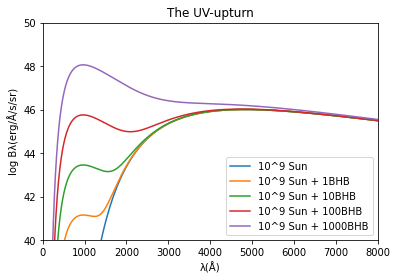

In [7]:
# plot results.
plt.axis([0,8000, 40,50])
# plt.axis([0,8000, 70,80])


plt.title('The UV-upturn')
plt.xlabel('λ(Å)')
plt.ylabel('log Bλ(erg/Å/s/sr)')
plt.plot(x,y,label='10^9 Sun')
plt.plot(x,y0,label='10^9 Sun + 1BHB')
plt.plot(x,y1,label='10^9 Sun + 10BHB')
plt.plot(x,y2,label='10^9 Sun + 100BHB')
plt.plot(x,y3,label='10^9 Sun + 1000BHB')
# plt.plot(x,M,label='M')
plt.legend(loc='best')

In [8]:
z=103
print(lamda[z])
print(np.log(y2[z])-np.log(y1[z]))

1004.2042042042042
0.051615224824090866


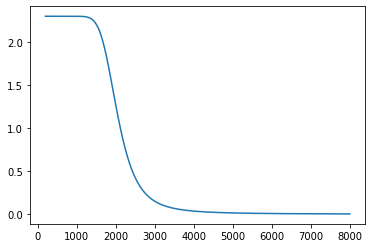

In [9]:
j=np.array(y2)-np.array(y1)
plt.plot(x,j)

In [11]:
z=1000
A=10
while A>0:
    A=B_lamda(z, T[0], s, num)*B_lamda(z-1, T[0], s, num)
    z-=1
print(z)


66
